In [1]:
# these are different kinds of trees and forest we have done 

In [28]:
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor

In [3]:
def file_to_numpy(filename):
    """
    Read an input file and convert it to numpy
    """
    df = pd.read_csv(filename)
    return df.to_numpy()

file = pd.read_csv("train.csv")
y = file.iloc[:, 1:2]
x = pd.read_csv("x_transformed.csv")
x = x.iloc[:, 1:]

xHatNames = x.head(0)
xHatNames = xHatNames.T
x = x.to_numpy()
y = y.to_numpy()
y = y.T[0]
# print(y)
# print(len(x[0]))
# print(xHatNames)

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=40)

In [4]:
# decision tree

In [6]:
# best parameter
clf = GridSearchCV(
        DecisionTreeRegressor(), 
        [{'max_depth': range(40,201,40), 'min_samples_split': range(50, 301, 50)}], cv=5, scoring='r2')
clf.fit(xTrain, yTrain)
means = clf.cv_results_['mean_test_score']
for mean, params in zip(means, clf.cv_results_['params']):
    print("%0.3f for %r" % (mean, params))
print(clf.best_params_) 

0.480 for {'max_depth': 40, 'min_samples_split': 50}
0.514 for {'max_depth': 40, 'min_samples_split': 100}
0.526 for {'max_depth': 40, 'min_samples_split': 150}
0.535 for {'max_depth': 40, 'min_samples_split': 200}
0.541 for {'max_depth': 40, 'min_samples_split': 250}
0.547 for {'max_depth': 40, 'min_samples_split': 300}
0.473 for {'max_depth': 80, 'min_samples_split': 50}
0.511 for {'max_depth': 80, 'min_samples_split': 100}
0.526 for {'max_depth': 80, 'min_samples_split': 150}
0.535 for {'max_depth': 80, 'min_samples_split': 200}
0.540 for {'max_depth': 80, 'min_samples_split': 250}
0.546 for {'max_depth': 80, 'min_samples_split': 300}
0.479 for {'max_depth': 120, 'min_samples_split': 50}
0.511 for {'max_depth': 120, 'min_samples_split': 100}
0.526 for {'max_depth': 120, 'min_samples_split': 150}
0.535 for {'max_depth': 120, 'min_samples_split': 200}
0.541 for {'max_depth': 120, 'min_samples_split': 250}
0.547 for {'max_depth': 120, 'min_samples_split': 300}
0.481 for {'max_depth': 1

In [7]:
# R-square and mean squaer error
clf.fit(xTrain, yTrain)
yHat = clf.predict(xTest)
print("r2_score:")
print(r2_score(yTest, yHat))
print("mean square error:")
print(mean_squared_error(yTest, yHat, squared=False))

r2_score:
0.45204121717397083
mean square error:
9.739889929136242


In [10]:
# tree representation
clf = DecisionTreeRegressor(max_depth = 40, min_samples_split=300)
clf.fit(xTrain, yTrain)
text_representation = tree.export_text(clf)
print(text_representation) 

|--- feature_492 <= 0.50
|   |--- feature_442 <= 0.50
|   |   |--- value: [77.80]
|   |--- feature_442 >  0.50
|   |   |--- feature_309 <= 0.50
|   |   |   |--- value: [114.45]
|   |   |--- feature_309 >  0.50
|   |   |   |--- feature_231 <= 0.50
|   |   |   |   |--- feature_560 <= 0.50
|   |   |   |   |   |--- feature_162 <= 0.50
|   |   |   |   |   |   |--- feature_278 <= 0.50
|   |   |   |   |   |   |   |--- feature_46 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_139 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_129 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [112.30]
|   |   |   |   |   |   |   |   |   |--- feature_129 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- value: [90.08]
|   |   |   |   |   |   |   |   |--- feature_139 >  0.50
|

In [14]:
# model analysis
# We will choose 50 features with the largest constants in linear regression model
# They are the 50 most important features in the model
print("features importances of the model:")
print(clf.feature_importances_)
print()
sort_index = np.argsort(clf.feature_importances_)
print("index of the best 30 features")
print(sort_index[:30])

coefficient of the model on features:
[0.00000000e+00 0.00000000e+00 1.17028463e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.10750799e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.17595859e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.84489212e-04
 0.00000000e+00 0.00000000e+00 6.42898565e-03 0.00000000e+00
 7.30367496e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0

In [15]:
# random forest

[-41.02441044103771, -25.280061556664478, -15.168265964732608, -9.27358413015727, -5.904522195682592, -3.7004666775185076, -2.267025462432503, -1.2787532188985304, -0.6873506473084328, -0.21895860122348432, 0.11211160513773599, 0.2489294364373048, 0.4270979245913722, 0.4453398835112907, 0.5116907694665735, 0.53778377319853, 0.5553637712219417, 0.5558887065754808, 0.5575074096022303, 0.559359114250455, 0.5607909305723473, 0.5643018623230465, 0.5655732676005361, 0.567081140041556, 0.5681044119745496, 0.5661086344082268, 0.5659207790749827, 0.5674253519670167, 0.5681765576606227, 0.5690142076626483, 0.5674512184652721, 0.5676481094907846, 0.5683284777057385, 0.5694434041686063, 0.5692837739955615, 0.571352981989511, 0.572148043087225, 0.5730149178348223, 0.573734408820933, 0.5733281358419167, 0.5730304063006907, 0.5728144703184972, 0.5721285179091398, 0.5722860600190146, 0.5724977109113301, 0.5729090796430272, 0.5733743644586734, 0.5729108582575941, 0.572570181959563, 0.5730906990456706, 

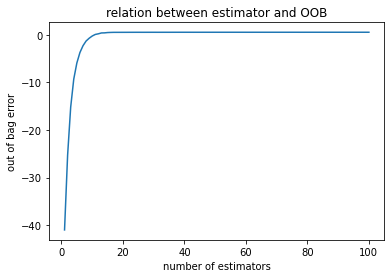

In [21]:
# estimation of how many estimator we need by out of bag error
# the parameter are randomly choosen 
import warnings
warnings.filterwarnings("ignore")
OOBS = []
num = []
for i in range(1, 101):
    clf = RandomForestRegressor(n_estimators=i, max_depth=10,
                             oob_score=True, random_state=0)
    clf.fit(xTrain, yTrain)
    OOBS.append(clf.oob_score_)
    num.append(i)
print(OOBS)
print()
plt.plot(num, OOBS)
plt.xlabel("number of estimators")
plt.ylabel("out of bag error")
plt.title("relation between estimator and OOB")
plt.show()

In [22]:
# best parameters
clf = GridSearchCV(
        RandomForestRegressor(), 
        [{'max_depth': range(10,100,10), 'min_samples_split': range(50, 300, 50),
          'max_features': range(20,100,20)}], cv=3, scoring='r2')
clf.fit(xTrain, yTrain)
means = clf.cv_results_['mean_test_score']
for mean, params in zip(means, clf.cv_results_['params']):
    print("%0.3f for %r" % (mean, params))
print("Best parameters set found on development set:")
print()
print(clf.best_params_)

0.559 for {'max_depth': 10, 'max_features': 20, 'min_samples_split': 50}
0.549 for {'max_depth': 10, 'max_features': 20, 'min_samples_split': 100}
0.547 for {'max_depth': 10, 'max_features': 20, 'min_samples_split': 150}
0.542 for {'max_depth': 10, 'max_features': 20, 'min_samples_split': 200}
0.535 for {'max_depth': 10, 'max_features': 20, 'min_samples_split': 250}
0.583 for {'max_depth': 10, 'max_features': 40, 'min_samples_split': 50}
0.580 for {'max_depth': 10, 'max_features': 40, 'min_samples_split': 100}
0.577 for {'max_depth': 10, 'max_features': 40, 'min_samples_split': 150}
0.575 for {'max_depth': 10, 'max_features': 40, 'min_samples_split': 200}
0.570 for {'max_depth': 10, 'max_features': 40, 'min_samples_split': 250}
0.585 for {'max_depth': 10, 'max_features': 60, 'min_samples_split': 50}
0.584 for {'max_depth': 10, 'max_features': 60, 'min_samples_split': 100}
0.585 for {'max_depth': 10, 'max_features': 60, 'min_samples_split': 150}
0.581 for {'max_depth': 10, 'max_features

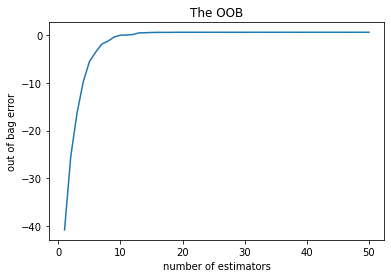

In [23]:
# the out of bag error
OOBS = []
num = []
for i in range(1, 51):
    clf = RandomForestRegressor(n_estimators=i, max_depth=10, max_features=80,
                                min_samples_split=200, oob_score=True)
    clf.fit(xTrain, yTrain)
    OOBS.append(clf.oob_score_)
    num.append(i)
plt.plot(num, OOBS)
plt.xlabel("number of estimators")
plt.ylabel("out of bag error")
plt.title("The OOB")
plt.show()

In [24]:
# R-squaer and mean square error
clf = RandomForestRegressor(n_estimators=i, max_depth=10, max_features=80,
                            min_samples_split=150, oob_score=True, random_state=0)
clf.fit(xTrain, yTrain)
yHat = clf.predict(xTest)
print("r2_score:")
print(r2_score(yTest, yHat))
print("mean square error:")
print(mean_squared_error(yTest, yHat, squared=False))

r2_score:
0.508330418454483
mean square error:
9.226070585845187


In [25]:
# model analysis
# We will choose 50 features with the largest constants in linear regression model
# They are the 50 most important features in the model
print("feature impoortances of the model")
print(clf.feature_importances_)
print()
sort_index = np.argsort(clf.feature_importances_)
print("index of the best 30 features")
print(sort_index[:30])

feature impoortances of the model
[0.00000000e+00 1.49345997e-03 4.32596623e-04 0.00000000e+00
 0.00000000e+00 2.24777748e-03 5.38126551e-04 7.84409964e-04
 7.46284153e-03 1.53781808e-04 0.00000000e+00 0.00000000e+00
 7.21321652e-05 0.00000000e+00 0.00000000e+00 1.18631164e-03
 1.50999700e-03 1.85440243e-05 0.00000000e+00 2.94926053e-03
 1.94293625e-02 0.00000000e+00 1.73590089e-05 0.00000000e+00
 0.00000000e+00 3.90459904e-04 8.17487602e-05 5.92793288e-04
 0.00000000e+00 9.19088940e-04 0.00000000e+00 3.93842234e-04
 0.00000000e+00 1.03273104e-05 0.00000000e+00 1.45060759e-03
 3.13395022e-05 0.00000000e+00 1.86771551e-04 0.00000000e+00
 1.67036849e-03 0.00000000e+00 1.18986467e-04 8.74615183e-06
 5.18533978e-03 0.00000000e+00 5.49226756e-04 0.00000000e+00
 4.30001253e-05 0.00000000e+00 3.78397951e-05 6.48771769e-05
 0.00000000e+00 0.00000000e+00 1.46731628e-03 0.00000000e+00
 1.88274996e-04 2.57983152e-05 0.00000000e+00 0.00000000e+00
 2.37259291e-05 0.00000000e+00 8.80897834e-04 3.602

In [26]:
# adaptive boosting

In [29]:
# best parameters
clf = GridSearchCV(
        AdaBoostRegressor(), 
        [{'n_estimators': [10, 20, 30, 50, 100], 'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1],
                }], cv=7, scoring='r2')
clf.fit(xTrain,yTrain)
means = clf.cv_results_['mean_test_score']
for mean, params in zip(means, clf.cv_results_['params']):
    print("%0.3f for %r" % (mean, params))
print("Best parameters set found on development set:")
print()
print(clf.best_params_)

0.585 for {'learning_rate': 0.01, 'n_estimators': 10}
0.586 for {'learning_rate': 0.01, 'n_estimators': 20}
0.577 for {'learning_rate': 0.01, 'n_estimators': 30}
0.577 for {'learning_rate': 0.01, 'n_estimators': 50}
0.576 for {'learning_rate': 0.01, 'n_estimators': 100}
0.586 for {'learning_rate': 0.02, 'n_estimators': 10}
0.578 for {'learning_rate': 0.02, 'n_estimators': 20}
0.577 for {'learning_rate': 0.02, 'n_estimators': 30}
0.575 for {'learning_rate': 0.02, 'n_estimators': 50}
0.571 for {'learning_rate': 0.02, 'n_estimators': 100}
0.578 for {'learning_rate': 0.05, 'n_estimators': 10}
0.572 for {'learning_rate': 0.05, 'n_estimators': 20}
0.574 for {'learning_rate': 0.05, 'n_estimators': 30}
0.567 for {'learning_rate': 0.05, 'n_estimators': 50}
0.534 for {'learning_rate': 0.05, 'n_estimators': 100}
0.582 for {'learning_rate': 0.1, 'n_estimators': 10}
0.569 for {'learning_rate': 0.1, 'n_estimators': 20}
0.564 for {'learning_rate': 0.1, 'n_estimators': 30}
0.538 for {'learning_rate': 

In [32]:
# R-squaer and mean square error
clf = AdaBoostRegressor(learning_rate = 0.02, n_estimators = 10)
clf.fit(xTrain,yTrain)
yHat = clf.predict(xTest)
print("r2_score:")
print(r2_score(yTest, yHat))
print("mean square error:")
print(mean_squared_error(yTest, yHat, squared=False))

r2_score:
0.510589886445656
mean square error:
9.204846966761908


In [33]:
# model analysis
# We will choose 50 features with the largest constants in linear regression model
# They are the 50 most important features in the model
print("feature impoortances of the model")
print(clf.feature_importances_)
print()
sort_index = np.argsort(clf.feature_importances_)
print("index of the best 30 features")
print(sort_index[:30])

feature impoortances of the model
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.13854948e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.17646066e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000